만약 colab으로 돌리고 있다면 확인해야하는 부분 - 라이브러리 제대로 설치되었는지

In [15]:
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git


  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/pyg-team/pytorch_geometric.gi /private/var/folders/8q/yjgzft41043gt_l8bqcfnzn40000gn/T/pip-req-build-p1xp8c5r did not run successfully.
  │ exit code: 128
  ╰─> [2 lines of output]
      remote: Repository not found.
      fatal: repository 'https://github.com/pyg-team/pytorch_geometric.gi/' not found
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://github.com/pyg-team/pytorch_geometric.gi /private/var/folders/8q/yjgzft41043gt_l8bqcfnzn40000gn/T/pip-req-build-p1xp8c5r did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
2.0.0
2.0.0


In [14]:
import torch_geometric
from torch_geometric.datasets import Planetoid

여기서부터가 진짜

In [1]:
from torch_geometric.datasets import TUDataset

dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES')

In [2]:
len(dataset)

600

In [3]:
dataset.num_classes

6

In [4]:
dataset.num_node_features

3

시각

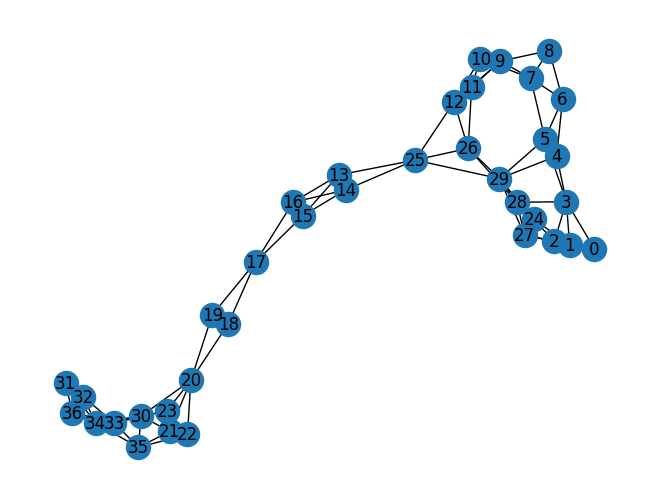

In [5]:
import networkx as nx
from torch_geometric.utils import to_networkx

data = dataset[0]
G = to_networkx(data, to_undirected=True)
nx.draw(G, with_labels=True)
# G = nx.Graph()



총 6의 클래스를 가졌고 각 노드당 피쳐가 3개인...

We now have access to all 600 graphs in the dataset:
여기 있는 600개의 그래프 모두에 접근할 수 있습니다.

Train / Test Split

In [ ]:
train_dataset = dataset[:540]
test_dataset = dataset[540:]

In [ ]:
dataset = dataset.shuffle()

Or train /test split with minibatch using data loader

In [6]:
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader

dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES', use_node_attr=True)
loader = DataLoader(dataset, batch_size=32, shuffle=True)


In [10]:
for batch in loader:
    print(batch.num_graphs)

32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
24


In [8]:
print(batch)

DataBatch(edge_index=[2, 2774], x=[727, 21], y=[24], batch=[727], ptr=[25])
